# babynames 데이터 
  
1. 시대별 얼마나 흔한 이름  
2. 이름 상대 순위  
3. 각 연도별 인기 이름  
4. 가장 많이 증가/감소 이름  
5. 이름 유행 분석  
  - 글자단위, 모음, 자음  
  - 유명인 이름 유행 분석  
 6. 미국사회보장국(SSA.GOV) -> 영어 이름 데이터 다운로드 가능  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names1880 = pd.read_csv("babynames/yob1880.txt", names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
#그룹화 연산 : 성별 기준 그룹화 -> 각 성별 태어난 아이들 수의 총 합
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [4]:
# 1880~ 2010년까지 이름을 전부 출력
pieces = []
for year in range(1880, 2011):
    df = pd.read_csv("babynames/yob{}.txt".format(year),
                     names=['name', 'sex', 'births'])
    df['year'] = year
    pieces.append(df)
    
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],
            name sex  births  year
 0          Mary   F    8149  1882
 1          Anna   F    3143  1882

In [5]:
#여러가지 테이블들 합치기
names = pd.concat(pieces, ignore_index=True) #인덱스 새로 부여하기
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [6]:
# sex     F    M
# year
# 1880   2만   3만
# ...    ...   ...
# 2010

# 위의 형태로 피벗팅
#aggfunc : 집계함수
total_births = names.pivot_table('births',aggfunc = sum, index='year', columns='sex') 
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<AxesSubplot:title={'center':'Total Births'}, xlabel='year'>

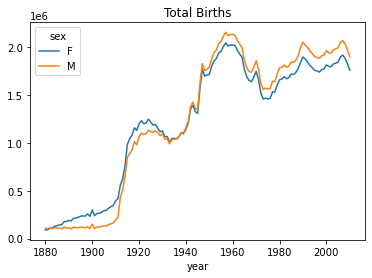

In [7]:
total_births.plot(title = 'Total Births')

  * 이름 별 연도, 성별 기준으로 나눈 그룹에서 차지하는 비율

In [8]:
#year와 sex를 기준으로 그룹화
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    #    (1880,F).태어난아이수/(1880,F).태어난아이수.sum() 
    #      -> 연도당 해당 이름이 차지하는 비율
    return group
    

names = names.groupby(['year', 'sex']).apply(add_prop) 
# 131(year)*2(sex) = 262개의 그룹
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [9]:
names.groupby(["year", "sex"]).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

* 각 연도별/성별에 따른 선호하는 이름 1000개씩 추출

In [10]:
# : 그룹화 -> 정렬 -> 해당 개수(1000)개만 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000] #내림차순 정렬 
    #ascending=True (오름차순 정렬)
    
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [11]:
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


* 이름 유행 분석

In [12]:
top1000['sex'] #top100.sex (동일한 표현 구문)

0         F
1         F
2         F
3         F
4         F
         ..
261872    M
261873    M
261874    M
261875    M
261876    M
Name: sex, Length: 261877, dtype: object

In [13]:
boys = top1000[top1000['sex']=="M"]
girls = top1000[top1000['sex']=="F"]
#불린참조 : 참(True)에 해당되는 자료들만 추출

In [14]:
"""
      John  Mary  ...  Micheal
year
1880  200   145   ...   546      
...
2010
"""
#위의 형태로 피벗팅
#############################################################
total_births = top1000.pivot_table('births', 
                                   index='year', 
                                   columns='name', 
                                   aggfunc=sum)
# 131rows : 연도(1880~2010)
# 783columns : 각 연도별 인기 있는 이름 상위 100개씩 추출했을 때,
#              중복을 제외한(unique) 이름들
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [16]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0
2007,14405.0,443.0,3665.0,597.0
2008,13273.0,379.0,3478.0,543.0


<AxesSubplot:xlabel='year'>

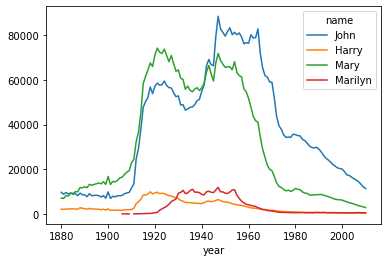

In [17]:
subset.plot()

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

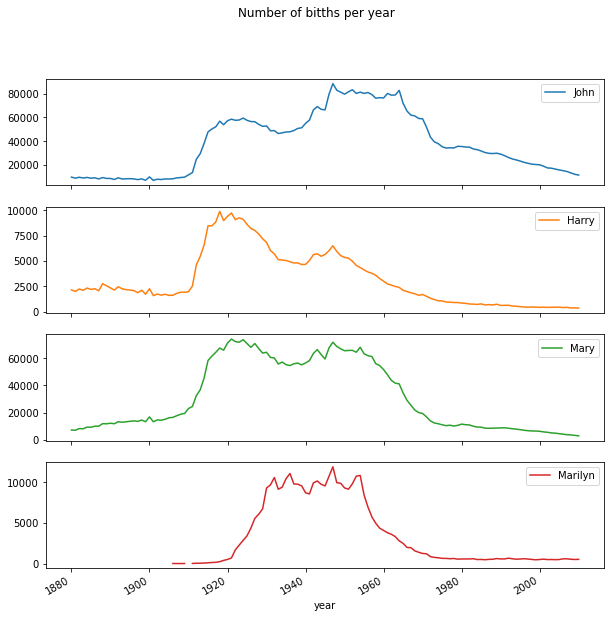

In [18]:
subset.plot(subplots=True, figsize=(10, 10), title="Number of bitths per year")
#figsize 단위 1 : 72픽셀

* 이름 사용 경향에 대한 다양성 측면에서 분석  
(흔한 이름을 기피하는 성향이 있는지?)

In [19]:
#top1000에 대해 누적비율
"""
1880 john    7%  7%
     Mary    6% 13%
     ...
     Michael 2% 51%  => 이름 종류 30가지 
    
1880 john    7%  7%
     Mary    6% 13%
     ...
     Michael 2% 51%  => 이름 종류 200가지
    
결론 : (누적비율이 50%가 되는 지점을 기준으로)2010년에 이름의 종류가 더 다양하다
"""

'\n1880 john    7%  7%\n     Mary    6% 13%\n     ...\n     Michael 2% 51%  => 이름 종류 30가지 \n    \n1880 john    7%  7%\n     Mary    6% 13%\n     ...\n     Michael 2% 51%  => 이름 종류 200가지\n    \n결론 : (누적비율이 50%가 되는 지점을 기준으로)2010년에 이름의 종류가 더 다양하다\n'

In [20]:
#인기있는 이름 1000개가 전체 출생수에서 차지하는 비율을
#연도별/성별 그래프로 출력

#전체 이름 중 상위 1000개 이름들의 비중
table = top1000.pivot_table('prop',
                   index='year',
                   columns='sex',
                   aggfunc=sum)

<AxesSubplot:xlabel='year'>

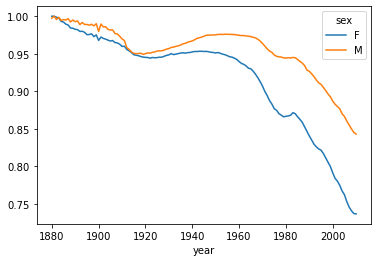

In [21]:
table.plot()

* 상위 50%의 비중을 차지하는 이름의 개수 세기

In [22]:
df = boys[boys['year'] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [23]:
df.sort_values(by = 'name') #이름 기준 오름차순정렬
prop_cumsum = df.sort_values(by = 'prop', ascending=False).prop.cumsum()
#prop를 기준으로 가장 인기있는 이름 순으로 정렬
prop_cumsum[:10] #상위 10개만 출력
#.prop 대신 [prop]으로 사용해도됌
#cumsum() : 누적합

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [24]:
#누적합이 50%(0.5)가 막 넘는 위치 구하기
prop_cumsum.values

array([0.01152297, 0.02093414, 0.0299592 , 0.03892999, 0.04781651,
       0.05657871, 0.06515496, 0.0734141 , 0.08152785, 0.08962106,
       0.09764789, 0.10540608, 0.11285189, 0.12027558, 0.12767241,
       0.13502288, 0.14236755, 0.14960266, 0.15682671, 0.16402073,
       0.17072223, 0.17719089, 0.18345201, 0.18965519, 0.19581465,
       0.2018324 , 0.20776851, 0.21357767, 0.21935364, 0.22507009,
       0.23057741, 0.23605576, 0.24151251, 0.24696821, 0.25239072,
       0.25747663, 0.26250776, 0.26753783, 0.27241251, 0.27717762,
       0.28179576, 0.28638704, 0.29085031, 0.29530516, 0.29975263,
       0.30404892, 0.30833468, 0.31260199, 0.31681137, 0.32091592,
       0.32494882, 0.32897594, 0.33294458, 0.33688004, 0.3407644 ,
       0.34463822, 0.34849361, 0.3523274 , 0.35615751, 0.35991702,
       0.36365547, 0.36736863, 0.37107073, 0.3746738 , 0.37809039,
       0.38146011, 0.38479453, 0.38812526, 0.39140226, 0.3945207 ,
       0.39752379, 0.40042626, 0.40320231, 0.40597309, 0.40872

In [25]:
prop_cumsum.values.searchsorted(0.5) #value값이 0.5보다 큰 첫번째 수의 인덱스
#이름의 개수는 -> 1개부터 시작하므로 1 추가
#           ->prop_cumsum.values.searchsorted(0.5)+1

116

In [26]:
prop_cumsum.iloc[116]

0.5006516075268308

In [27]:
#boys에 저장되어있는 1900년도 데이터에 대해서
#누적합을 구했을 때 0.5가 초과되는 지점까지 이름의 종류의 개수
# 2010년 -> 117개, 1900 -> 25개

df = boys[boys['year'] == 1900]
prop_cumsum_1900 = df.sort_values(by = 'prop', ascending=False).prop.cumsum()
print("누적합이 50%를 넘는 이름 종류의 개수 : ", 
      prop_cumsum_1900.values.searchsorted(0.5)+1)

누적합이 50%를 넘는 이름 종류의 개수 :  25


In [69]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by = 'prop', ascending=False).prop.cumsum()
    return group.values.searchsorted(q)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [70]:
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:xlabel='year'>

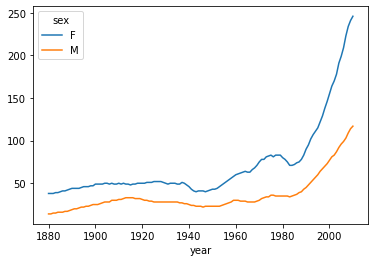

In [30]:
diversity.plot()

* 이름의 마지막 글자의 변화

In [31]:
#마지막 글자만 출력하기
last_letter = names.name.str[-1]

In [49]:
# !!!!!!!!!!!! map, lambda함수

def twoTimes(data):
    return data*2

x = [1,2,3,4]
y = [[1,2], [3,4]]
# map함수를 이용하여 [2,4,6,8]이 되도록 출력
# map(함수이름, 반복가능한 자료 형) 
# => 입력받은 반복가능한 자료형의 각 요소를 함수에 전달하여 수행한 결과를 묶어서 리턴
print(list(map(twoTimes, x)))
print(list(map(lambda a:a*2, x)))

[2, 4, 6, 8]
[2, 4, 6, 8]
[2, 4]
[6, 8]


In [56]:
last_letters = names.name.map(lambda x:x[-1])
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [58]:
table_lastletter = names.pivot_table("births",
                 index = last_letters,
                 columns = ['sex', 'year'],
                 aggfunc = sum)

In [62]:
subtable = table_lastletter.reindex(columns=[1910, 1960, 2010], level = 'year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [65]:
# 연도별 이름 마지막 글자를 구성하는 전체 알파벳 중 해당 알파벳이 차지하는 비율
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

In [66]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [67]:
letter_prop.sum() #비율

sex  year
F    1910    1.0
     1960    1.0
     2010    1.0
M    1910    1.0
     1960    1.0
     2010    1.0
dtype: float64